In [2045]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

In [87]:
# Misc functions

def plot_R2_matrix(A):
    fig, ax = plt.subplots()
    origin = np.zeros((A.T.shape[0], 2))

    ax.quiver(origin[:, 0], origin[:, 1],
              A.T[:, 0], A.T[:, 1],
              angles='xy', scale_units='xy', scale=1)

    max_val = np.max(np.abs(A.T)) + 0.5
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_aspect('equal')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Column vectors of matrix')
    ax.grid(True)

    plt.tight_layout()
    plt.show()



#### SVD Stuff:

Getting the principal vectors to which the singular values belong to

- (A.T)A = V(Σ^2)V.T
    - right-singular vectors
- A(A.T) = U(Σ^2)U.T 
    - left-singular vectors

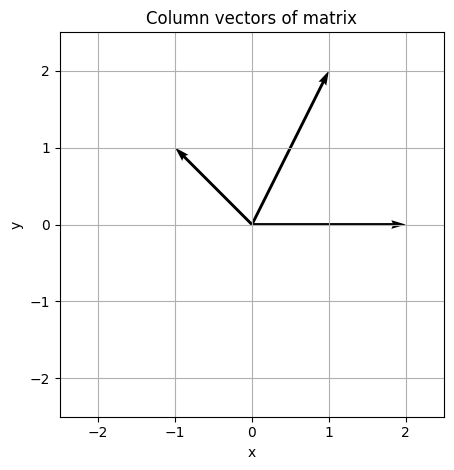

In [36]:
A = np.array([[2, -1, 1],
              [0, 1, 2]], dtype=float)          # 2 × 3 matrix

plot_R2_matrix(A)

In [37]:
# Step 1: eigendecompose AᵀA
ATA = A.T @ A
eigvals, eigvecs = eig(ATA)

In [93]:
# Sort by descending eigenvalue magnitude
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
σ = np.sqrt(eigvals[idx])                            # singular values
V  = eigvecs[:, idx]                                  # right-singular vectors

# Step 2: left-singular vectors
U = (A @ V[:, :len(σ)]) / σ                    # column normalisation implicit

print("σ =", σ)
print("v₁, v₂ =", V[:, 0], V[:, 1])
print("u₁, u₂ =", U[:, 0], U[:, 1])


σ = [2.57255398 2.0933146  0.        ]
v₁, v₂ = [ 0.55708601  0.74278135 -0.37139068] [ 0.66132786 -0.12630238  0.73938702]
u₁, u₂ = [-4.3156452e-17  4.3156452e-17] [1.04539715 0.64609097]


/var/folders/5r/tq98z9mx7ldcmk7cpdx25hvh0000gq/T/ipykernel_32892/526864613.py:8: RuntimeWarning: divide by zero encountered in divide
  U = (A @ V[:, :len(σ)]) / σ                    # column normalisation implicit


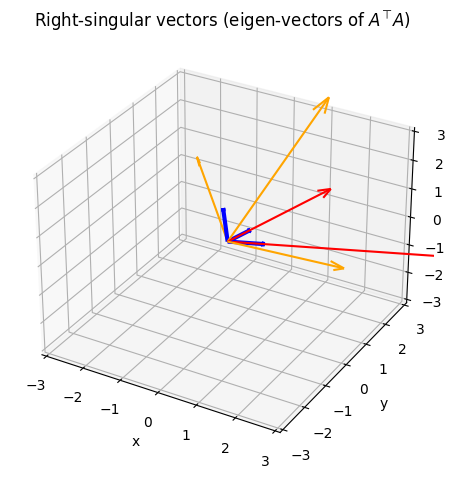

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)
for i in range(eigvecs.shape[1]):
    v = eigvecs[:, i]
    a = ATA[:, i]
    ax.quiver(*origin, *v, length=1.0, arrow_length_ratio=0.1, linewidth=3.0, color='blue')
    ax.quiver(*origin, *a, length=1.0, arrow_length_ratio=0.1, color='orange')
    
    v2 = eigvecs[:, i] * eigvals[i]
    ax.quiver(*origin, *v2, length=1.0, arrow_length_ratio=0.1, color='red')

lim = 3
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Right‑singular vectors (eigen‑vectors of $A^{\\top}A$)")
plt.tight_layout()
plt.show()

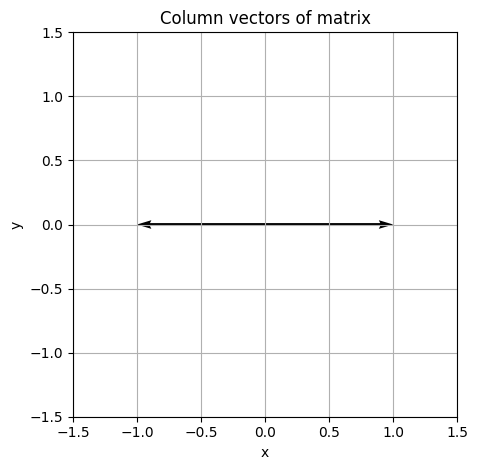

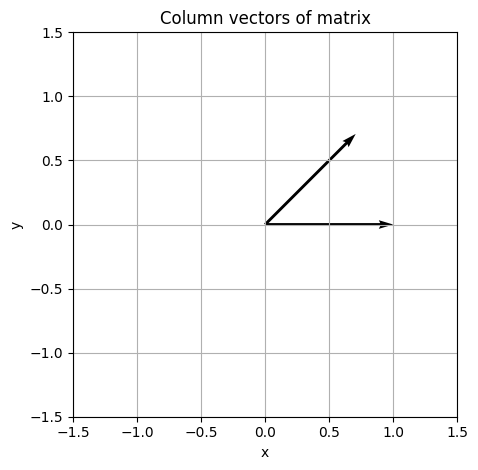

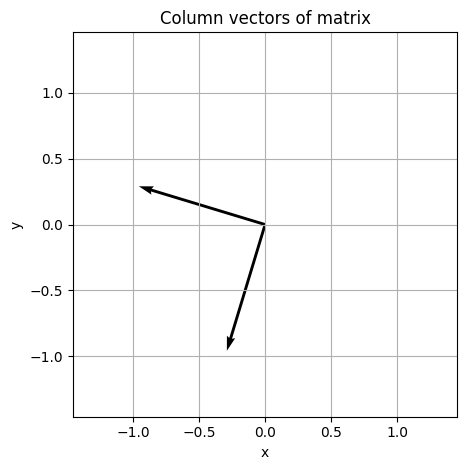

In [92]:
eigvals_A1, eigvecs_A1 = eig(A[:, np.array([0, 2])])
plot_R2_matrix(eigvecs_A1)


eigvals_A2, eigvecs_A2 = eig(A[:, np.array([0, 1])])
plot_R2_matrix(eigvecs_A2)

eigvals_A3, eigvecs_A3 = eig(A[:, np.array([1, 2])])
plot_R2_matrix(eigvecs_A3)

In [544]:
in_ = 1000
out = 1000
stddev = 1
x = np.random.normal(0, stddev, (in_, out))
Fro = np.sqrt(sum([np.power(i,2) for i in x.flatten()]))
Fro

999.9037307097004

In [545]:
np.sqrt(in_ * out) * stddev

1000.0

In [546]:
(x/Fro).max()

0.004851309493121027

In [558]:
spectral = np.linalg.norm(x, ord=2)
spectral

63.6682408662489

In [548]:
(x/l2).max()

0.07618935901165405

In [549]:
Fro/l2

15.704905885655752

In [556]:
a = [np.sqrt(sum([np.power(i, 2) for i in x[j]])) for j in range(len(x))] # L2 over the row vectors
# b = np.sqrt(sum([np.power(i, 2) for i in a])) # L2 over the L2
# b

999.9037307096783

In [565]:
np.diag((x@x)).max()

103.34876706321958

In [568]:
u, s, v = np.linalg.svd(x)
s[0]

63.668240866248965

In [581]:
in_ = 1000
out = 1000
stddev = 1/np.sqrt(out) # this ensures that the L2 norm of each output feature vector in the matrix is ~ 1 
# (each feature is loosely constrained to a hypershere)  
x = np.random.normal(0, stddev, (in_, out))

In [582]:
np.sqrt(sum([np.power(i, 2) for i in x[0]]))

1.007921203543024

In [1938]:
# take a look at backprop 
import torch
from torch import nn
from typing import List

class LazyModel(nn.Module):
    def __init__(self, arch:List[int], mup_init=False, use_relu=False, use_bias=False):
        super().__init__()
        
        l = len(arch)-1
        
        self.use_relu = use_relu
        self.mup_init = mup_init
        self.layers = nn.ModuleList([nn.Linear(arch[i], arch[i+1], bias=use_bias) for i in range(l)])
        self.relu = nn.ReLU() if use_relu else None
        
        self.init()
        
    def give_weight_info(self):
        for i, l in enumerate(self.layers):
            print(f"Info for layer {i} of shape ({l.weight.T.shape[0]}, {l.weight.T.shape[1]}):")
            print(f"\tMean: {l.weight.T.mean().item():.3f}")
            print(f"\tVar:  {l.weight.T.var().item():.3f}")
            print(f"\t\tKaiming He Expected:  {2/l.weight.T.shape[0]:.3f}")
            u, s, v = torch.svd(l.weight.T)
            print(f"\tSpectral Norm:  {s[0]:.3f}")
            print(f"\t\tYang Desired:  {np.sqrt(l.weight.T.shape[1]/ l.weight.T.shape[0]):.3f}")
            
            # SP initialization exceeds Parametrization 1 in any layer with fan-out smaller than fan-in
            
    def get_layer_outputs(self, x: torch.Tensor):
        if isinstance(x, np.ndarray):
            x = torch.tensor(x, dtype=torch.float)
        activations = []
        for layer in self.layers[:-1]:
            x = layer(x)
            if self.use_relu:
                x = self.relu(x)
            activations.append(x.detach().cpu().numpy())
        return activations
        
    def forward(self, x:torch.tensor):
        for l in self.layers:
            x = l(x)
            l.output_prerelu_var = x.var().item()
            l.output_l2 = torch.sqrt(torch.pow(x, 2).sum()).item()
            l.output_prerelu_mean = x.mean().item()

            if self.use_relu:
                x = self.relu(x)
                
            l.output_mean = x.mean().item()
            l.output_var = x.var().item()
        return x
        
    def init(self):
        for module in self.layers:
            if self.mup_init: # Implement the spectral scaling condition
                n_out, n_in = module.weight.shape
                σ = np.sqrt(n_out / n_in) / (np.sqrt(n_out) + np.sqrt(n_in))
                # ReLU-friendly √2 factor
                σ *= np.sqrt(2.0)
                with torch.no_grad():
                    module.weight.copy_(torch.normal(0, σ, module.weight.shape))
            else:# Kaiming He normal
                nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu') # std = 2/sqrt(input_dim)            
                        
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)

In [1386]:
arch = [
    4, 
    64,
    100,
    100,
    1_000,
    10,
]

kaiming_model = LazyModel(arch, use_relu=True)
kaiming_model

LazyModel(
  (layers): ModuleList(
    (0): Linear(in_features=4, out_features=64, bias=False)
    (1): Linear(in_features=64, out_features=100, bias=False)
    (2): Linear(in_features=100, out_features=100, bias=False)
    (3): Linear(in_features=100, out_features=1000, bias=False)
    (4): Linear(in_features=1000, out_features=10, bias=False)
  )
  (relu): ReLU()
)

In [1387]:
kaiming_model.give_weight_info()

Info for layer 0 of shape (4, 64):
	Mean: -0.020
	Var:  0.420
		Kaiming He Expected:  0.500
	Spectral Norm:  6.413
		Yang Desired:  4.000
Info for layer 1 of shape (64, 100):
	Mean: -0.000
	Var:  0.030
		Kaiming He Expected:  0.031
	Spectral Norm:  3.062
		Yang Desired:  1.250
Info for layer 2 of shape (100, 100):
	Mean: -0.001
	Var:  0.020
		Kaiming He Expected:  0.020
	Spectral Norm:  2.754
		Yang Desired:  1.000
Info for layer 3 of shape (100, 1000):
	Mean: -0.000
	Var:  0.020
		Kaiming He Expected:  0.020
	Spectral Norm:  5.832
		Yang Desired:  3.162
Info for layer 4 of shape (1000, 10):
	Mean: -0.000
	Var:  0.002
		Kaiming He Expected:  0.002
	Spectral Norm:  1.505
		Yang Desired:  0.100


In [1286]:
mean_tracker = {i:[] for i in range(len(model.layers))}
prerelu_mean_tracker = {i:[] for i in range(len(model.layers))}
var_tracker = {i:[] for i in range(len(model.layers))}
prerelu_var_tracker = {i:[] for i in range(len(model.layers))}
l2_tracker = {i:[] for i in range(len(model.layers))}

for _ in range(1_000):
    m = LazyModel(arch, use_relu=True)
    h = torch.normal(0, 1, size=(arch[0],))
    m(h)
    for i,l in enumerate(m.layers):
        mean_tracker[i].append(l.output_mean)
        var_tracker[i].append(l.output_var)
        l2_tracker[i].append(l.output_l2)
        prerelu_var_tracker[i].append(l.output_prerelu_var)
        prerelu_mean_tracker[i].append(l.output_prerelu_mean)
        
for i in range(len(m.layers)):
    print(f"Avg. Mean of Layer {i} Output: {np.mean(mean_tracker[i]):.3f}")
    print(f"\tAvg. Mean of Layer {i} PreReLU Output:  {np.mean(prerelu_mean_tracker[i]):.3f}  | Target: 0")
#     add_str = f" | Target: {np.mean(var_tracker[i-1]):.3f}" if i else ""
    print(f"Avg. Var of Layer {i} Output:  {np.mean(var_tracker[i]):.3f} | Target: 0.68")
    print(f"\tAvg. Var of Layer {i} PreReLU Output:  {np.mean(prerelu_var_tracker[i]):.3f}  | Target: 2")

    '''
    NOTE: The variance for Kaiming-He normalization should be ~0.68.
    Reason: 
    Var[KaimingHeNormal] = 2/dim_in
    
    h_l-1 ∈ R^dim_in;    W ∈ R^(dim_in x dim_out)
    h_l-1 ~ N(0, 1)
    W     ~ N(0, 2/dim_in) (reported in varaince)
    
    h_l ∈ R^dim_out = ∑_i^dim_in (w_i)*(h_l-1)
    Var[h_l] = ∑_i^dim_in Var[(w_i)]*Var[(h_l-1)] ==> dim_in * σ^2(W) ==> dim_in * (2 / dim_in) = 2
    Means h_l ~ N(0, 2)
        NOTE: This is only the pre-activation feature 
    
    E[ ReLU(h_l) ] = 1/√π ~= 0.56
    Var[ ReLU(h_l) ] = 1 - 1/π ~= 0.68
    '''
    
    '''
    Why does Kaiming He Normalization give you Θ(√dim_out) for the L2 norm of each feature vector ?
    r_h_l = ReLU(h_l)
    2nd Moment: Var[ h_l ] = 2
    1st Moment: E[ h_l ]   = 0
        
    L2(r_h_l) = √( ∑_i^dim_out (E[x_i^2]) ) ==> √( ∑_i^100 (2) ) ==> √(2 * 100) = 14.1
    '''
    t = np.sqrt(m.layers[i].weight.shape[0])
    kaiming_he_normal_target = np.sqrt(m.layers[i].weight.shape[0] * np.mean(prerelu_var_tracker[i]))
    print(f"Avg. L2 of Layer {i} Output:   {np.mean(l2_tracker[i]):.3f} | Yang Desired: {t:.3f} | He Expected: {kaiming_he_normal_target:.3f}")
    
    
    # keep it in the hypersphere
    print()

Avg. Mean of Layer 0 Output: 0.541
	Avg. Mean of Layer 0 PreReLU Output:  0.005  | Target: 0
Avg. Var of Layer 0 Output:  0.693 | Target: 0.68
	Avg. Var of Layer 0 PreReLU Output:  2.043  | Target: 2
Avg. L2 of Layer 0 Output:   10.736 | Yang Desired: 8.000 | He Expected: 11.435

Avg. Mean of Layer 1 Output: 0.530
	Avg. Mean of Layer 1 PreReLU Output:  -0.004  | Target: 0
Avg. Var of Layer 1 Output:  0.695 | Target: 0.68
	Avg. Var of Layer 1 PreReLU Output:  2.041  | Target: 2
Avg. L2 of Layer 1 Output:   13.304 | Yang Desired: 10.000 | He Expected: 14.286

Avg. Mean of Layer 2 Output: 0.527
	Avg. Mean of Layer 2 PreReLU Output:  -0.000  | Target: 0
Avg. Var of Layer 2 Output:  0.689 | Target: 0.68
	Avg. Var of Layer 2 PreReLU Output:  2.024  | Target: 2
Avg. L2 of Layer 2 Output:   13.178 | Yang Desired: 10.000 | He Expected: 14.227

Avg. Mean of Layer 3 Output: 0.524
	Avg. Mean of Layer 3 PreReLU Output:  -0.001  | Target: 0
Avg. Var of Layer 3 Output:  0.691 | Target: 0.68
	Avg. Var

In [1218]:
# NOTE: If we don't use biases and don't use ReLU, this is just a Gaussian process (assuming Gaussian init)

In [1248]:
# What Greg Yang wants to have happen:

In [1349]:
# 1. He wants the L2 norm of the feature vector (h) to be Θ(√(dim_out))
#    This happens when h has mean 0 and variance 1 - contrast this with a variance of 2 for Kaiming-He

# Example:
width = 100
input_size = 50
batch = 1_000
h = np.random.normal(0, 1.0, (batch, width))   # per-dim σ = 1
round(np.linalg.norm(h, axis=1).mean(), 3)

9.954

In [1361]:
# 2. In order to get `h` to be of mean 0, variance 1, 
#       Greg says that the spectral norm of the weights being Θ(√(dim_out/dim_in) assures that property
#       And to get the 

weights = np.random.normal(0, np.sqrt(width / input_size) / (np.sqrt(width) + np.sqrt(input_size)), (input_size, width))

u, s, v = torch.svd(torch.tensor(weights))
print(f"Spectral Norm: Got: {s[0].item():.3f}  | Yang Target: {np.sqrt(width/input_size):.3f}")
frobenius = np.sqrt(sum((np.power(w_ij, 2) for w_ij in weights.flatten())))
target_fro = np.sqrt(min(width, input_size) * (width/input_size))
print(f"Frobenius:     Got: {frobenius:.3f}  | Yang Target: {target_fro:.3f}")

Spectral Norm: Got: 1.386  | Yang Target: 1.414
Frobenius:     Got: 5.897  | Yang Target: 10.000


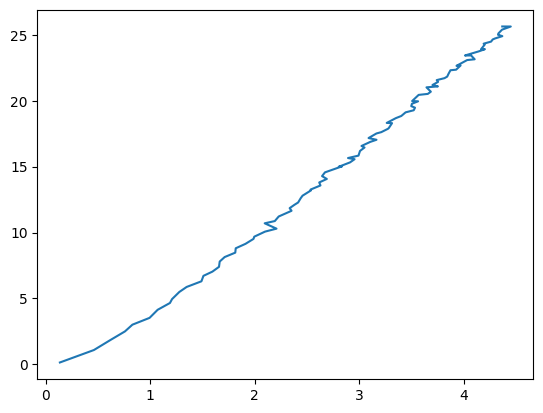

In [1358]:
# TODO: make plots showing how the spectral norm and forbenius norm change as you change the relation of the 
# input width to output width
specs = []
target_specs = []
fros = []
target_fros = []
for this_width in range(1, 1_000, 10):
    weights = np.random.normal(0, np.sqrt(this_width / input_size) / (np.sqrt(this_width) + np.sqrt(input_size)), (input_size, this_width))

    u, s, v = torch.svd(torch.tensor(weights))
    spectral = s[0].item()
    target_spec = np.sqrt(this_width/input_size)
    specs.append(spectral)
    target_specs.append(target_spec)
    
    frobenius = np.sqrt(sum((np.power(w_ij, 2) for w_ij in weights.flatten())))
    target_fro = np.sqrt(min(this_width, input_size) * (this_width/input_size))
    fros.append(frobenius)
    target_fros.append(target_fro)
    
plt.plot(specs, fros);

In [1388]:
mup_model = LazyModel(arch, mup_init=True, use_relu=True)
mup_model

LazyModel(
  (layers): ModuleList(
    (0): Linear(in_features=4, out_features=64, bias=False)
    (1): Linear(in_features=64, out_features=100, bias=False)
    (2): Linear(in_features=100, out_features=100, bias=False)
    (3): Linear(in_features=100, out_features=1000, bias=False)
    (4): Linear(in_features=1000, out_features=10, bias=False)
  )
  (relu): ReLU()
)

In [1389]:
mup_model.give_weight_info()

Info for layer 0 of shape (4, 64):
	Mean: -0.001
	Var:  0.001
		Kaiming He Expected:  0.500
	Spectral Norm:  0.352
		Yang Desired:  4.000
Info for layer 1 of shape (64, 100):
	Mean: -0.000
	Var:  0.004
		Kaiming He Expected:  0.031
	Spectral Norm:  1.098
		Yang Desired:  1.250
Info for layer 2 of shape (100, 100):
	Mean: -0.000
	Var:  0.005
		Kaiming He Expected:  0.020
	Spectral Norm:  1.375
		Yang Desired:  1.000
Info for layer 3 of shape (100, 1000):
	Mean: 0.000
	Var:  0.000
		Kaiming He Expected:  0.020
	Spectral Norm:  0.449
		Yang Desired:  3.162
Info for layer 4 of shape (1000, 10):
	Mean: 0.004
	Var:  0.165
		Kaiming He Expected:  0.002
	Spectral Norm:  13.693
		Yang Desired:  0.100


# Comparisons on some dummy data

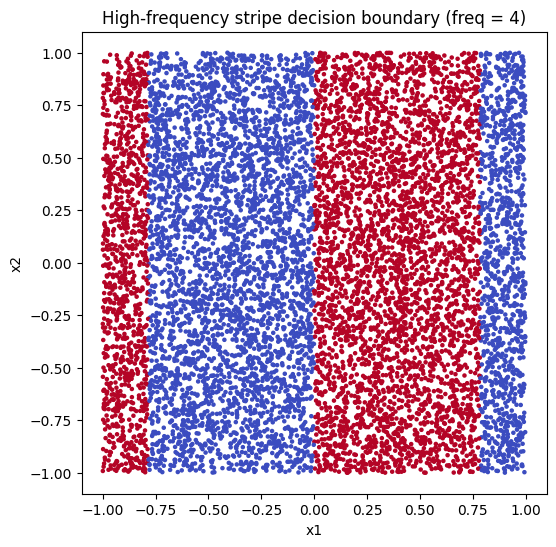

In [1885]:
num_samples = 10000
frequency = 4  # This requires ~4 linear regions to classify correctly
n_dims = 2

X = np.random.uniform(-1, 1, (num_samples, n_dims)) # inputs have a 2 dimensions and are in the set [-1, 1]

# High-frequency stripe pattern: decision boundary is sin(100 * x)
Y = (np.sin(frequency * X[:, 0]) > 0).astype(int)

# Optional: add noise to labels
# noise_std = 0.05
# Y = np.where(np.random.rand(num_samples) < noise_std, 1 - Y, Y)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', s=5)
plt.title(f'High-frequency stripe decision boundary (freq = {frequency})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [2104]:
arch = [
    n_dims, 
    10,
    10,
    64,
    100,
    200,
    2,
]

In [2152]:
kaiming_model = LazyModel(arch, use_relu=True, use_bias=True)

In [2153]:
def _plot_layer_series(data_dict, title, y_label, model, targets=None):
    n_layers = len(data_dict)
    fig, axes = plt.subplots(n_layers, 1, figsize=(9, 2.5 * n_layers), sharex=True)

    for idx, ax in enumerate(axes):
        series = data_dict[idx]
        series = [float(v) if v is not None else np.nan for v in series]
        c = 'blue' if 'weights' in title.lower() else 'orange'
        ax.plot(series, lw=1.3, c=c)
        if targets is not None and idx < len(targets):
            ax.axhline(targets[idx], linestyle='--', color='black', linewidth=1, alpha=0.7)
        m = model.layers[idx].weight.T.shape
        ax.set_ylabel(f"Layer {idx} ({m[0]}, {m[1]})\n{y_label}")
        ax.grid(alpha=0.3)

    axes[-1].set_xlabel("Mini-batch #")
    fig.suptitle(title, fontsize=14)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


def plot_all_norms_by_layer(sup_w, sup_g, fro_w, fro_g, spec_w, spec_g, feature_l2_w, feature_l2_g, model):
    _plot_layer_series(sup_w,  "Sup-norm ‖·‖∞  (Weights)",  "‖W‖∞", model)
    _plot_layer_series(sup_g,  "Sup-norm ‖·‖∞  (Gradients)", "‖∇W‖∞", model)

    _plot_layer_series(fro_w,  "Frobenius ‖·‖F  (Weights)",  "‖W‖F", model)
    _plot_layer_series(fro_g,  "Frobenius ‖·‖F  (Gradients)","‖∇W‖F", model)

    _plot_layer_series(spec_w, "Spectral ‖·‖2  (Weights)",   "σ₁(W)", model, targets=[np.sqrt(i.weight.shape[0]/i.weight.shape[1]) for i in model.layers][:-1])
    _plot_layer_series(spec_g, "Spectral ‖·‖2  (Gradients)", "σ₁(∇W)", model, targets=[np.sqrt(i.weight.shape[0]/i.weight.shape[1]) for i in model.layers][:-1])
    
    _plot_layer_series(spec_w, "Feature-Wise ‖·‖2  (Weights)",   "‖h‖2", model, targets=[np.sqrt(i.weight.shape[0]) for i in model.layers][:-1])
    _plot_layer_series(spec_g, "Feature-Wise ‖·‖2  (Gradients)", "‖∇h‖2", model, targets=[np.sqrt(i.weight.shape[0]) for i in model.layers][:-1])

In [2154]:
lr = 1e-2
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(kaiming_model.parameters(), lr)

epochs = 10
bsz = num_samples//10
def train(model):
    model.train()
    
    losses = []
    sup_w, sup_g   = defaultdict(list), defaultdict(list)
    fro_w, fro_g   = defaultdict(list), defaultdict(list)
    spec_w, spec_g = defaultdict(list), defaultdict(list)
    feature_l2_w, feature_l2_g = defaultdict(list), defaultdict(list)
    for e in range(epochs):
        for b in range(0, num_samples, bsz):
            # 1. zero the grads
            optimizer.zero_grad()
            
            # 2. get the batch
            start, end = b, b+bsz if b+bsz <= num_samples else num_samples
            x = torch.tensor(X[start:end], dtype=torch.float32)
            y = torch.tensor(Y[start:end], dtype=torch.long)
            

            preds = model(x)
            loss = criterion(preds, y) # already includes a softmax
            if e==0 and b==0:
                # should be ~ -((P_0*ln(P_0) + Q_0*ln(P_0)) +  (P_1*ln(P_1) + Q_1*ln(P_1)) ==> 
                #      2 * -0.5*ln(0.5) = -ln(1/2) = 0.693 nats
                print(f"First batch loss: {loss.item():.3f} nats | expected: 0.693 nats (random)")
            losses.append(loss.item())
            loss.backward()
            
            # 4. save weight data
            for i, layer in enumerate(model.layers):
                W = layer.weight
                G = layer.weight.grad

                # ----- weights -----
                sup_w[i].append(W.abs().max().item())
                fro_w[i].append(torch.linalg.norm(W, ord='fro').item())
                spec_w[i].append(torch.linalg.matrix_norm(W, ord=2).item())
                feature_l2_w[i].append(torch.norm(W, p=2, dim=1).mean())

                # ----- grads -----
                if G is None:
                    sup_g[i].append(float('nan'))
                    fro_g[i].append(float('nan'))
                    spec_g[i].append(float('nan'))
                else:
                    sup_g[i].append(G.abs().max().item())
                    fro_g[i].append(torch.linalg.norm(G, ord='fro').item())
                    spec_g[i].append(torch.linalg.matrix_norm(G, ord=2).item())
                    feature_l2_g[i].append(torch.norm(G, p=2, dim=1).mean())
            
            optimizer.step()
            
    print(f"Final loss: {losses[-1]:.3f}")
    
    plt.figure(figsize=(10, 5))
    plt.title('CE Loss (nats)');
    plt.plot(losses);
    plt.show();
#     for i in range(1, epochs):
#         plt.axvline(x=i * (num_samples // bsz),color='grey', linestyle='--', linewidth=0.5)
    
    plot_all_norms_by_layer(
        sup_w, sup_g,
        fro_w, fro_g,
        spec_w, spec_g,
        feature_l2_w, feature_l2_g,
        model
    )

    


First batch loss: 0.747 nats | expected: 0.693 nats (random)
Final loss: 0.694


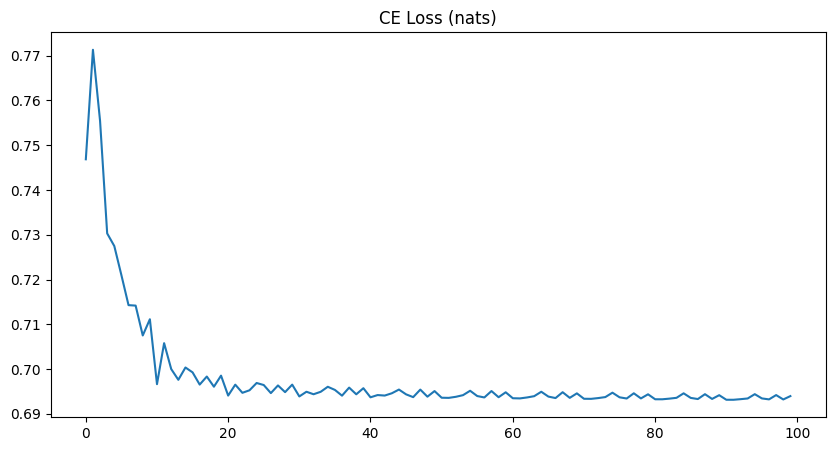

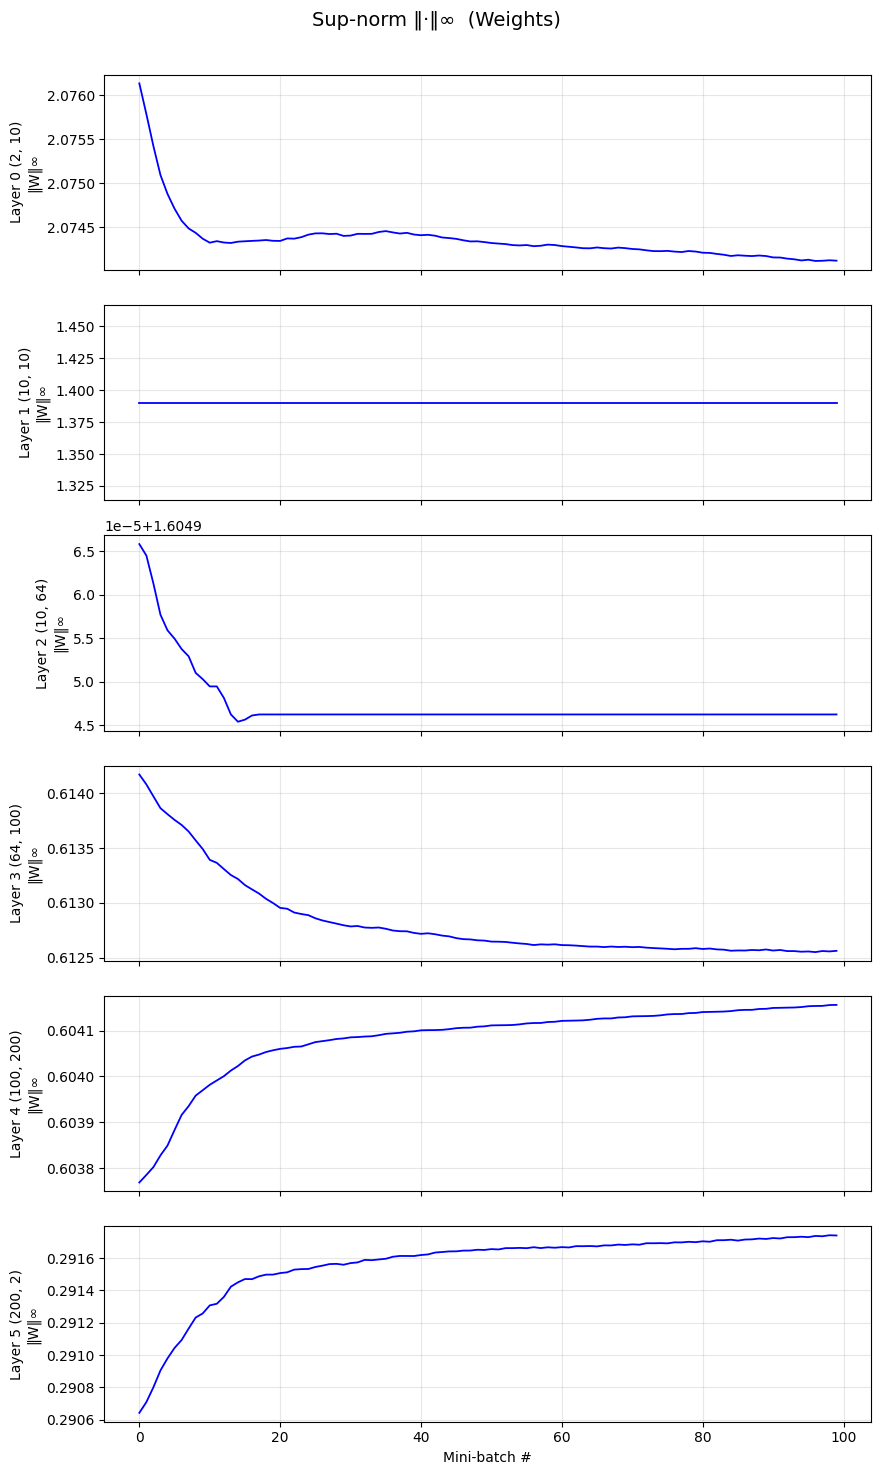

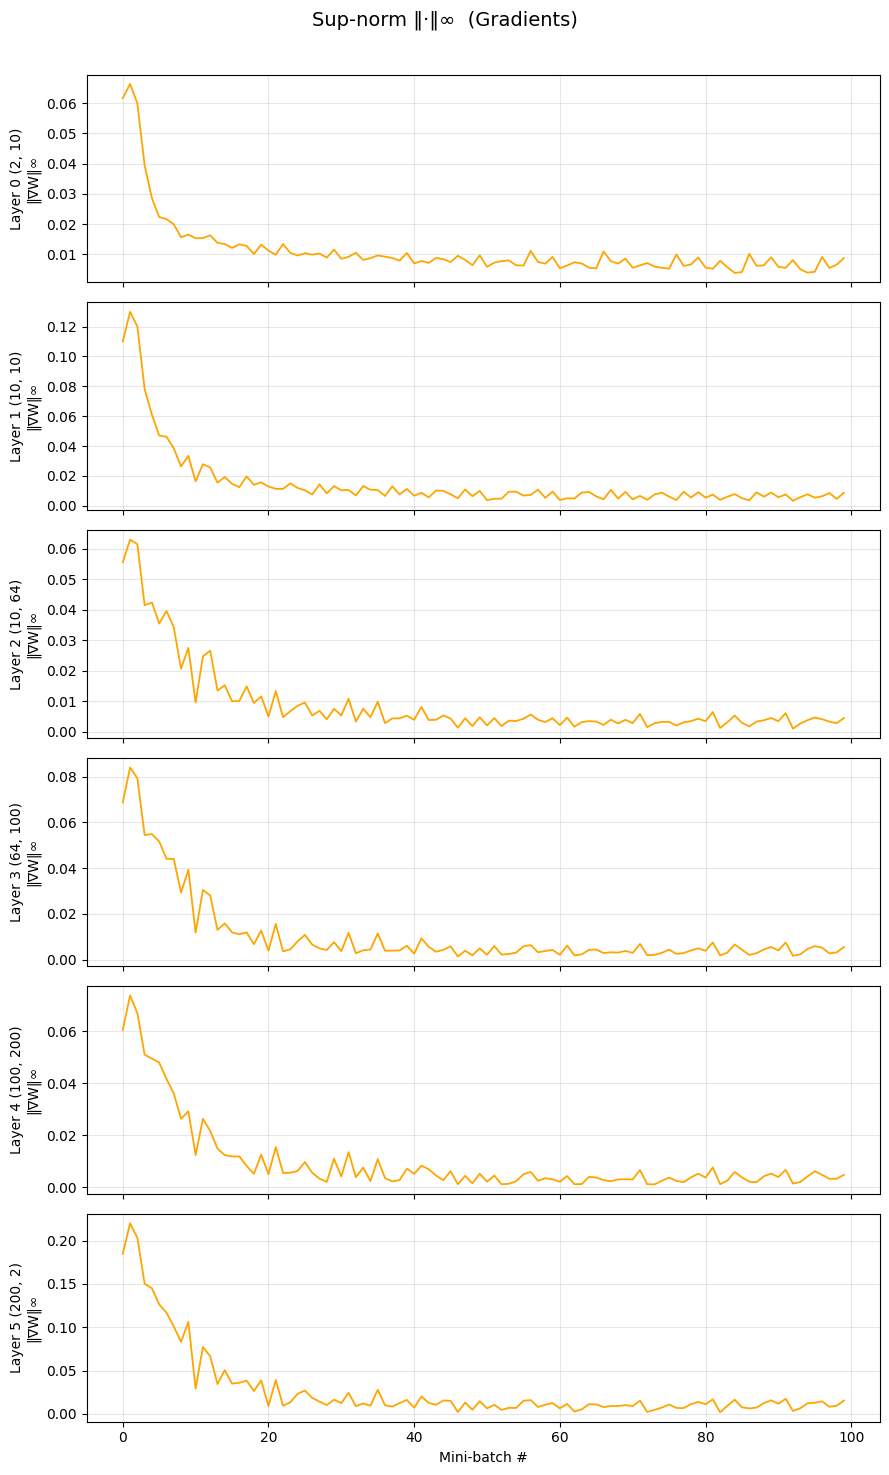

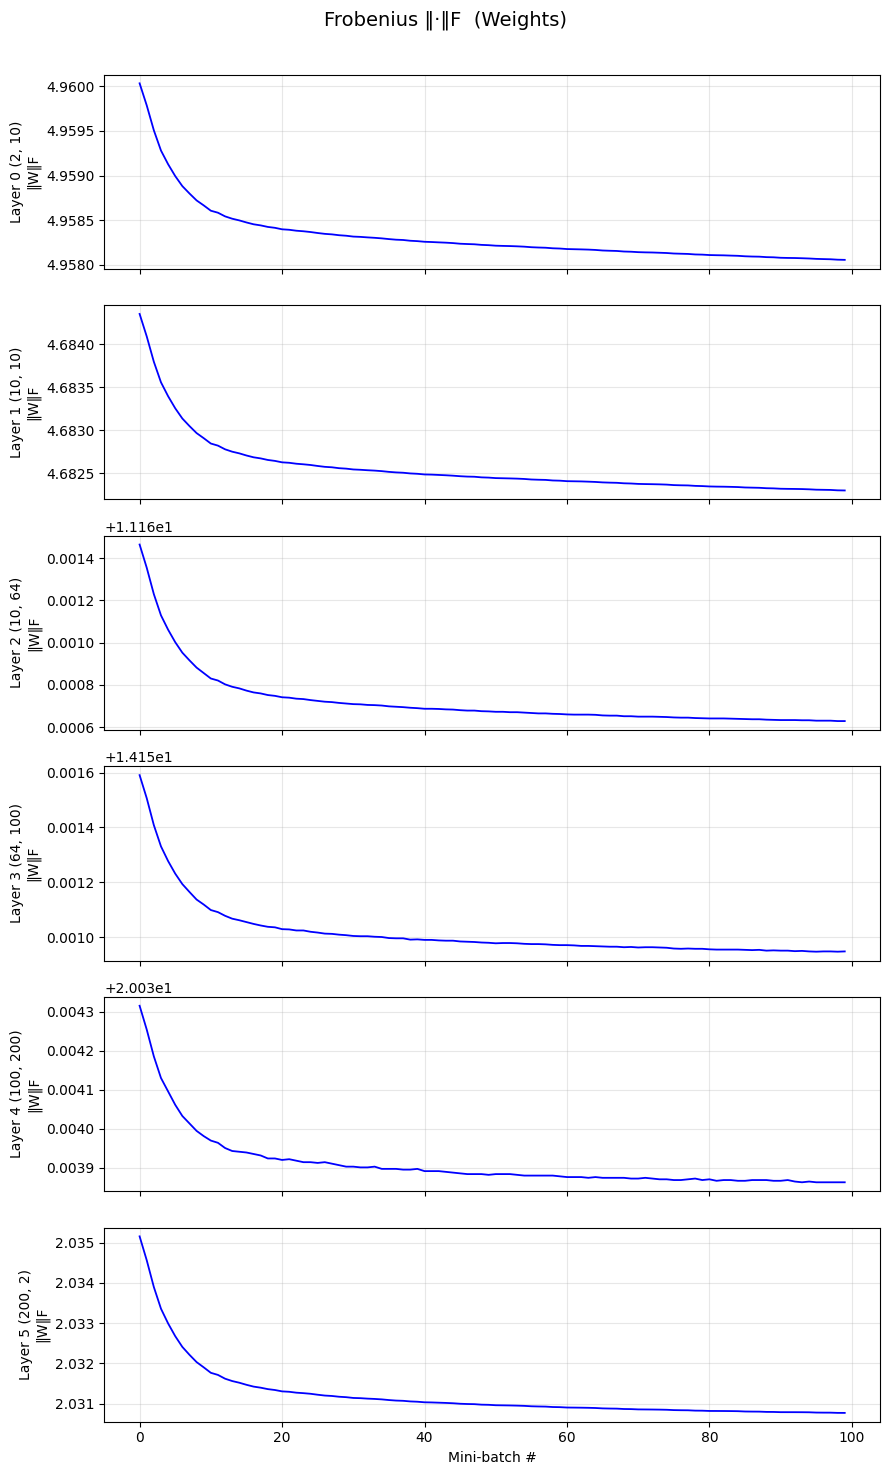

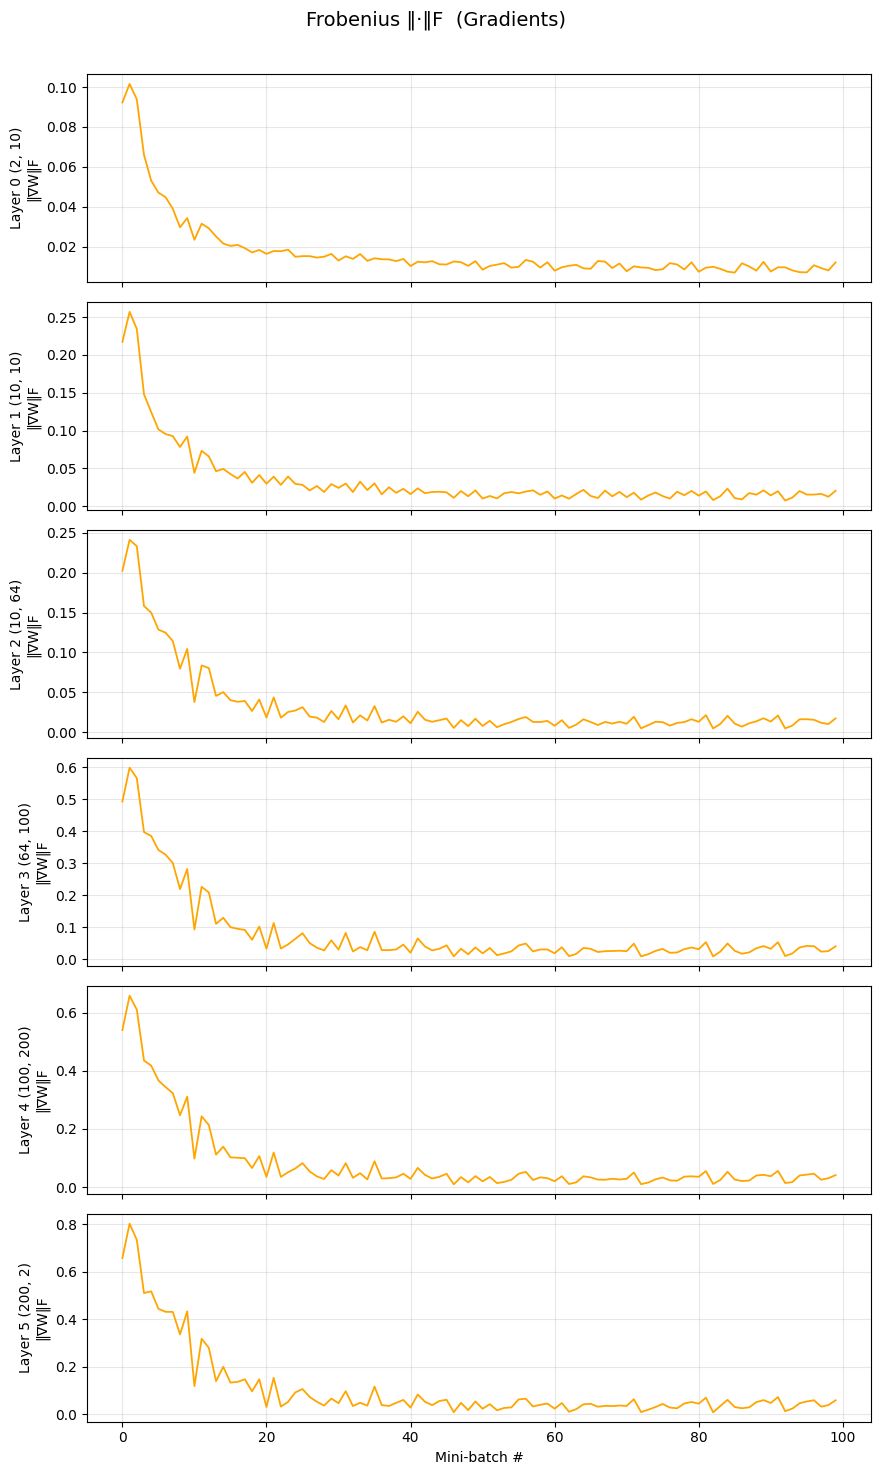

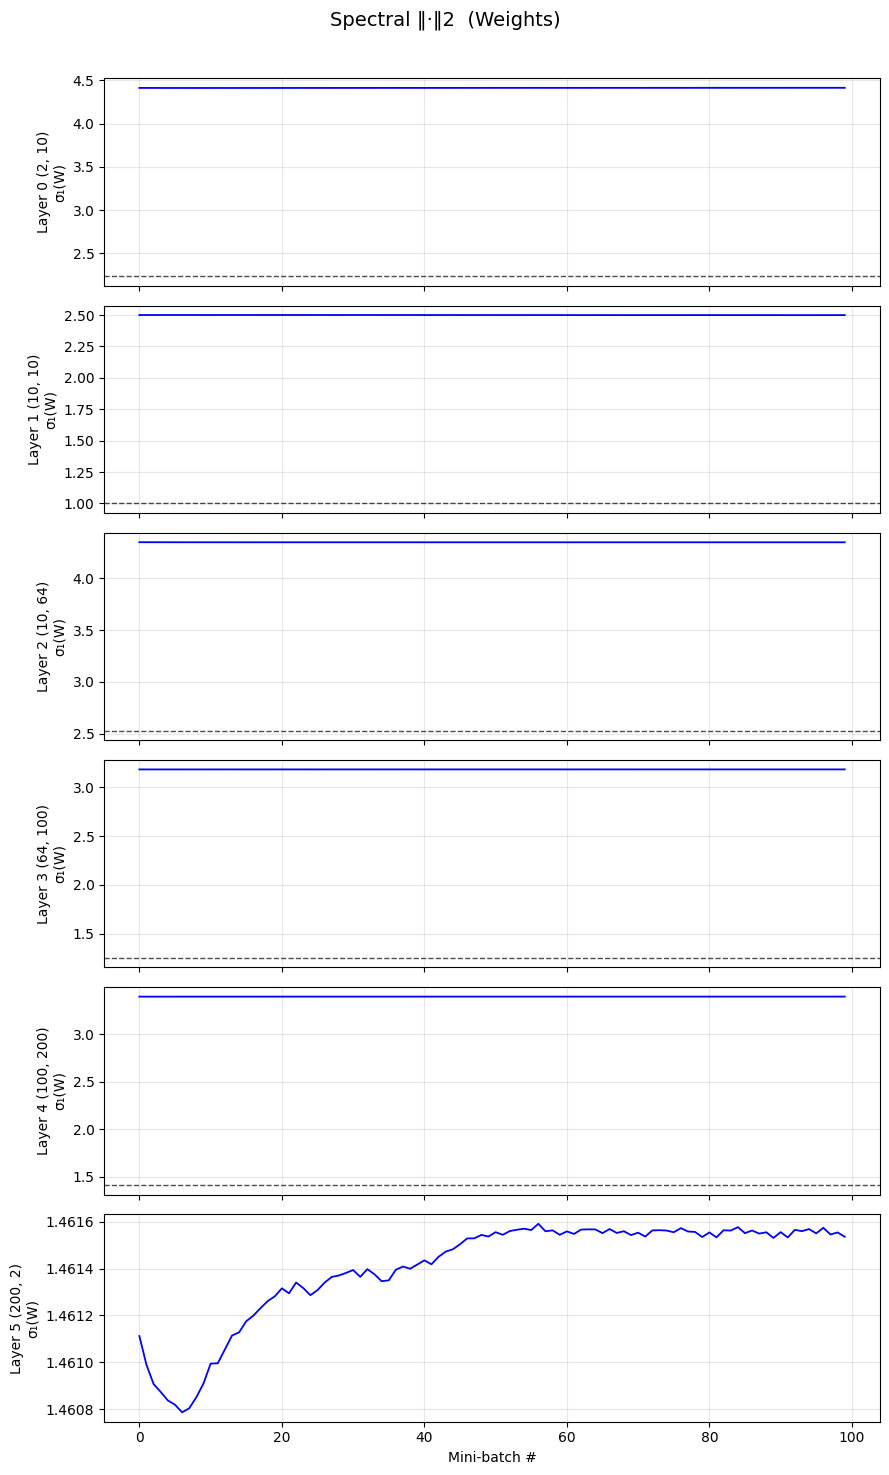

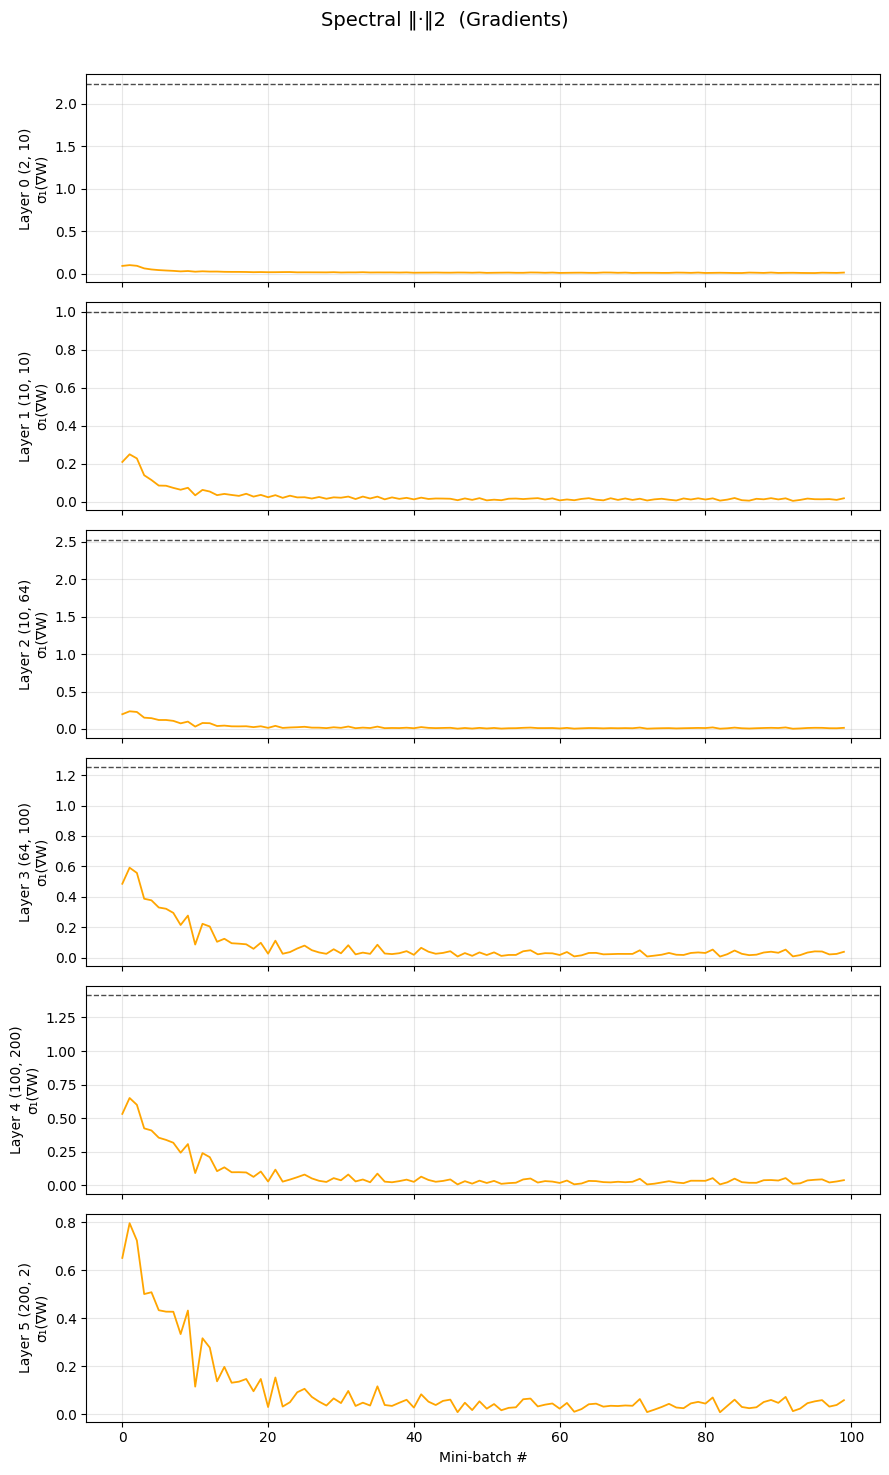

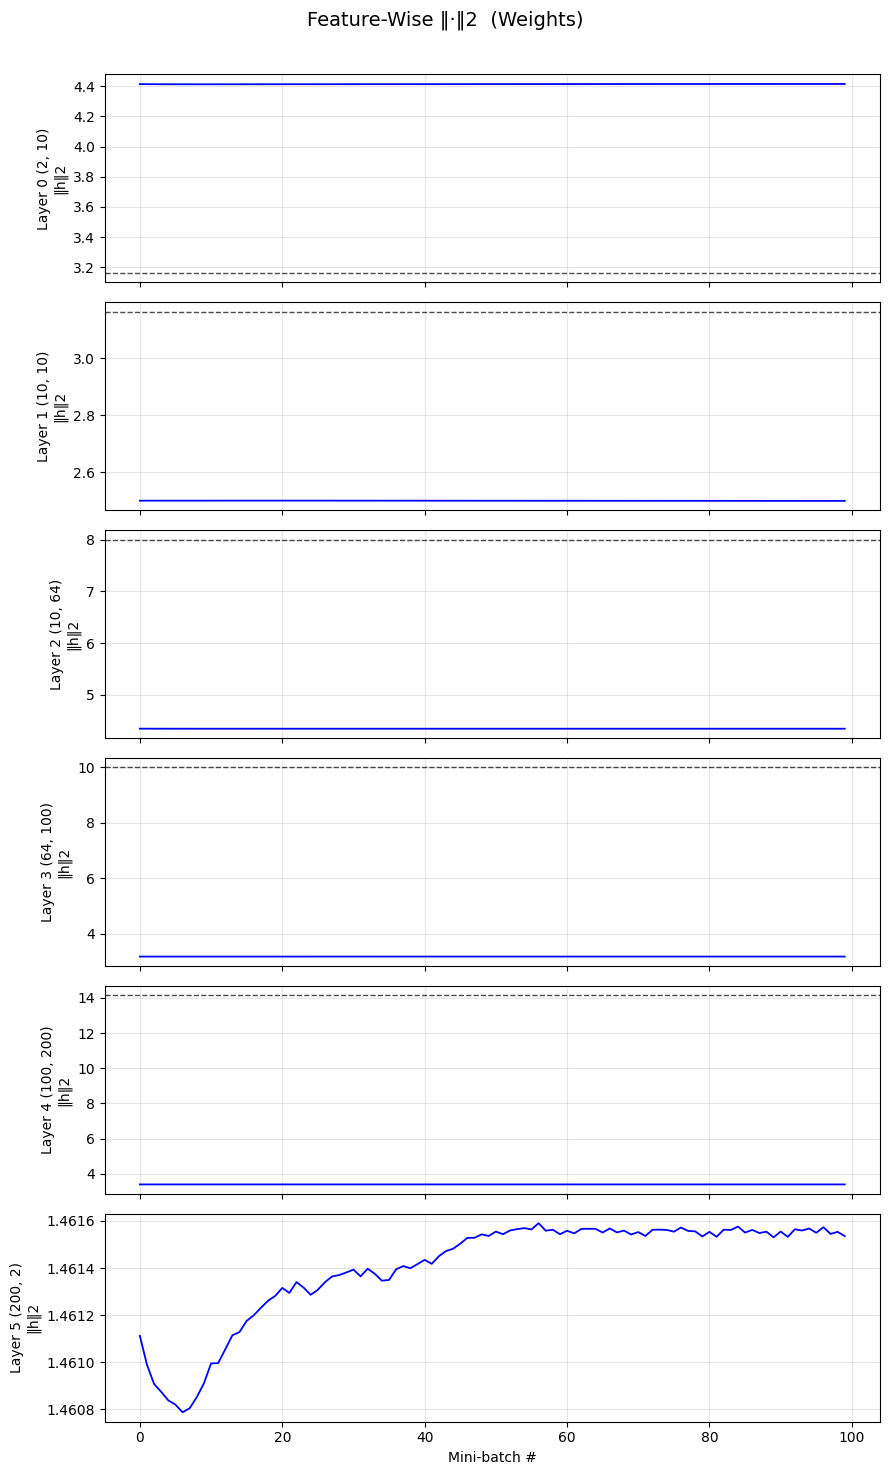

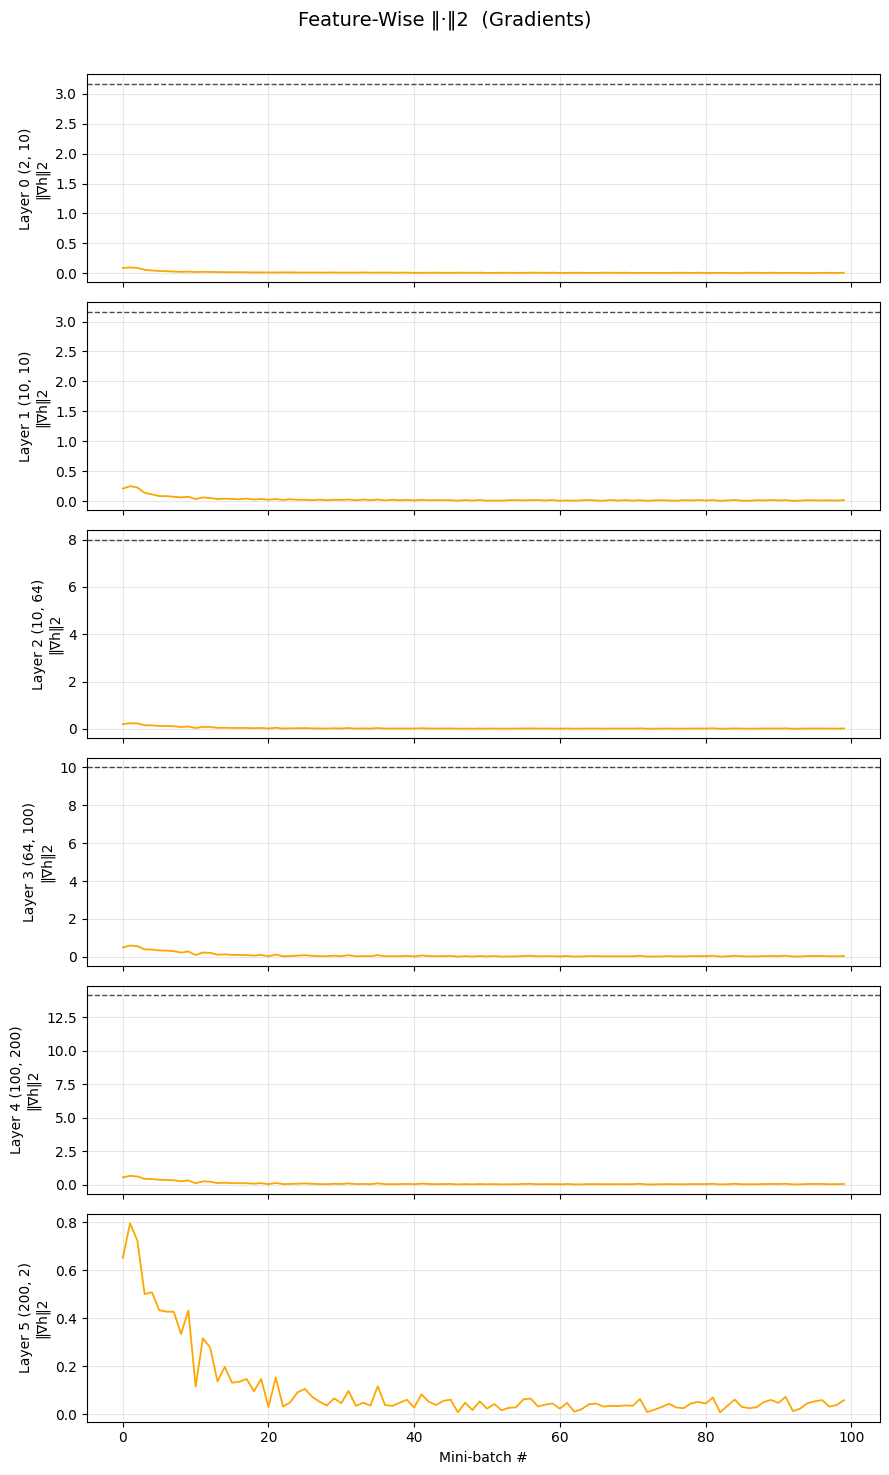

In [2155]:
train(kaiming_model)

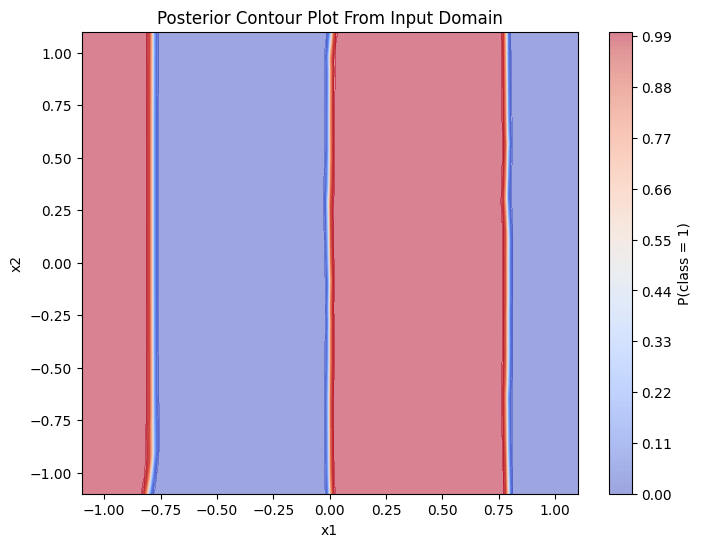

In [2109]:
def plot_boundaries(model):
    model.eval()
    
    resolution = 200
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        logits = model(grid_tensor)
        probs = torch.nn.functional.softmax(logits, dim=1)  # shape: [N, num_classes]

    Z = probs[:, 1].reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    contour = plt.contourf(xx, yy, Z, alpha=0.5, levels=100, cmap="coolwarm")
    plt.colorbar(contour, label="P(class = 1)")
#     scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap="coolwarm", s=40, alpha=0.5)
    plt.title('Posterior Contour Plot From Input Domain')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
plot_boundaries(kaiming_model)

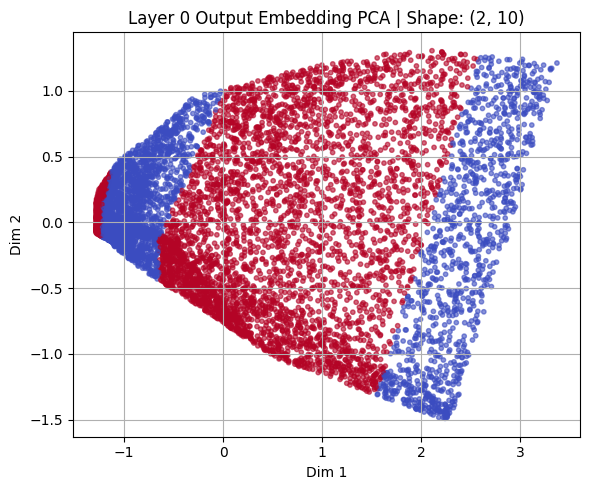

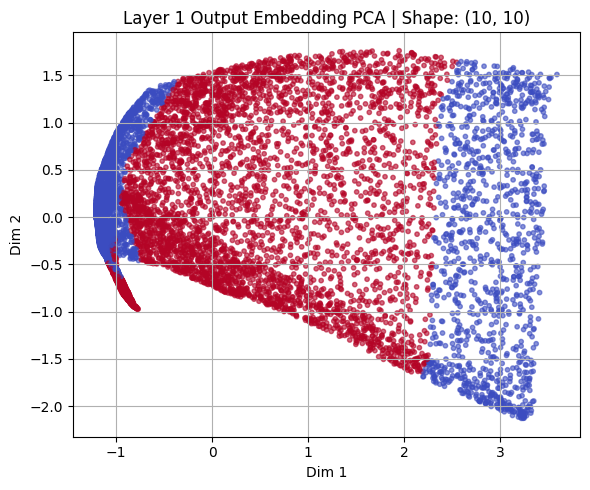

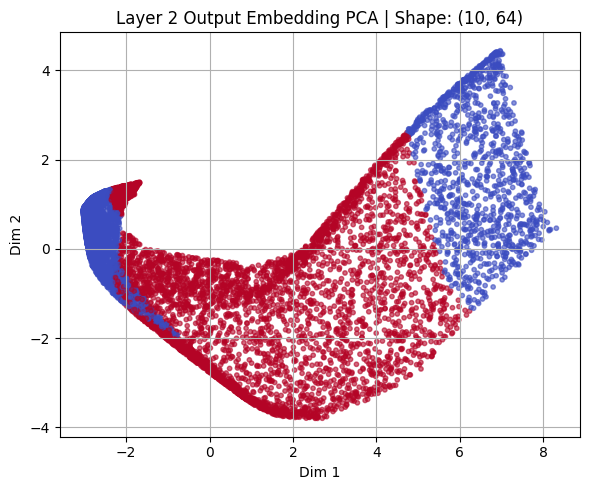

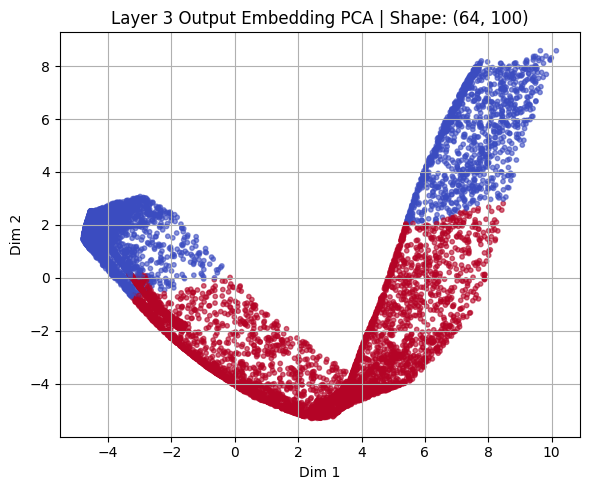

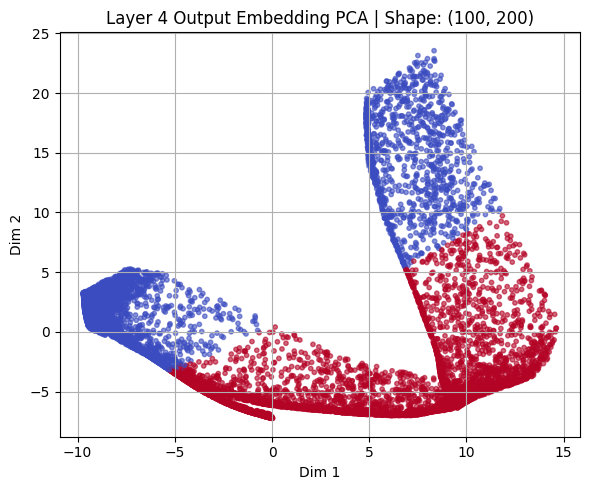

In [2110]:
from sklearn.decomposition import PCA

def visualize_hidden_layers(model, X, Y, method='pca'):
    model.eval()
    x_tensor = torch.tensor(X, dtype=torch.float32)
    activations = model.get_layer_outputs(x_tensor)

    for i, act in enumerate(activations):
        plt.figure(figsize=(6, 5))
        if method == 'pca':
            proj = PCA(n_components=2).fit_transform(act)
        else:
            raise NotImplementedError("Only PCA is currently supported.")
        
        model_weight_shape = model.layers[i].weight
        plt.scatter(proj[:, 0], proj[:, 1], c=Y, cmap='coolwarm', s=10, alpha=0.6)
        plt.title(f"Layer {i} Output Embedding PCA | Shape: ({model_weight_shape.shape[1]}, {model_weight_shape.shape[0]})")
        plt.xlabel("Dim 1")
        plt.ylabel("Dim 2")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
visualize_hidden_layers(kaiming_model, X, Y)